### 라이브러리 임포트

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

### 함수 정의

In [8]:
# LxL 행렬을 -1과 1로 무작위하게 채우는 함수
def mat(L):
    data = np.random.choice([-1, 1], size=(L, L))
    return data

In [9]:
# 루트를 찾는 함수
def find(i):
    if ptr[i] < 0:
        return i
    else:
        ptr[i] = find(ptr[i]) # 경로 압축
        return ptr[i]

In [10]:
# 두 집합을 합치는 함수
def union(r1, r2, big):
    if r2 != r1:
        if ptr[r1] > ptr[r2]: # 작은 트리를 큰 트리 아래에 붙임
            ptr[r2] += ptr[r1]
            ptr[r1] = r2
            r1 = r2
        else:
            ptr[r1] += ptr[r2]
            ptr[r2] = r1

        if -ptr[r1] > big: # 기존의 big보다 크면 갱신
            big = -ptr[r1]
    return r1, r2, big

### $5×5$

최종 big 값: 25


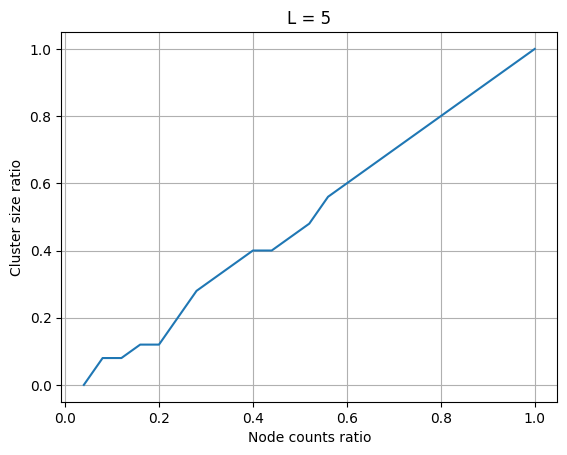

In [11]:
# 행렬 5 x 5
L = 5
test = mat(L)
N = L*L  # 요소의 수
Kmax = 4  # 최대 이웃 수

# 행렬을 하나의 리스트로 변환
ptr = [item for sublist in test for item in sublist]

# 이웃 배열
nn = np.empty((N, Kmax), int)
for i in range(N):
    nn[i][0] = i-1+L*(i%L==0) # left
    nn[i][1] = i+1-L*(i%L==L-1) # right
    nn[i][2] = i-L+N*(i//L==0) # up
    nn[i][3] = i+L-N*(i//L==L-1) # up

# 점을 채워나갈 순서 결정
order = np.arange(N)
np.random.shuffle(order)

#그래프 데이터를 저장할 리스트
x_data = []
y_data = []

big = 0
ptr = [-N-1] * N  # 처음엔 모두 빈 칸

# Union-Find 알고리즘 실행
for i in range(N):
    r1, s1 = order[i], order[i] # 위의 order를 따라 점 추가
    ptr[s1] = -1 # 그 크기는 1
    for j in range(Kmax):
        s2 = nn[s1, j] # 이웃 점들에 대해
        if ptr[s2] != -N-1: # 만일 비어있지 않으면
            r2 = find(s2) # 작은 쪽을 합친다
            r1, r2, big = union(r1, r2, big)

    # 탐색한 노드의 비율과 클러스터 사이즈의 비율 계산
    x_data.append((i+1) / N)
    y_data.append(big / N)

print("최종 big 값:", big)

# 그래프 그리기
plt.plot(x_data, y_data)
plt.xlabel('Node counts ratio')
plt.ylabel('Cluster size ratio')
plt.title(f'L = {L}')
plt.grid(True)
plt.show()

### $256×256$

최종 big 값: 65536


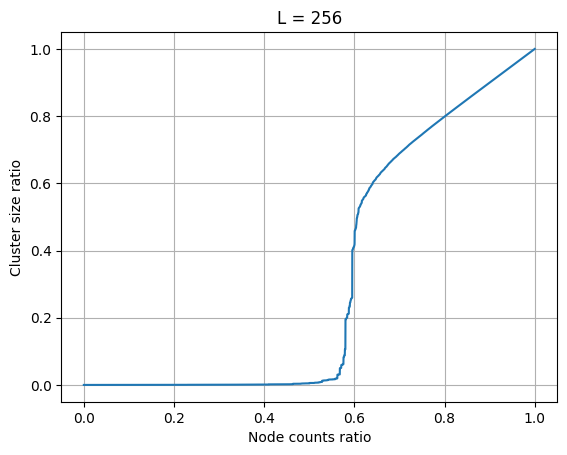

In [12]:
# 행렬 256 x 256
L = 256
test = mat(L)
N = L*L  # 요소의 수
Kmax = 4  # 최대 이웃 수

# 행렬을 하나의 리스트로 변환
ptr = [item for sublist in test for item in sublist]

# 이웃 배열
nn = np.empty((N, Kmax), int)
for i in range(N):
    nn[i][0] = i-1+L*(i%L==0) # left
    nn[i][1] = i+1-L*(i%L==L-1) # right
    nn[i][2] = i-L+N*(i//L==0) # up
    nn[i][3] = i+L-N*(i//L==L-1) # up

# 점을 채워나갈 순서 결정
order = np.arange(N)
np.random.shuffle(order)

#그래프 데이터를 저장할 리스트
x_data = []
y_data = []

big = 0
ptr = [-N-1] * N  # 처음엔 모두 빈 칸

# Union-Find 알고리즘 실행
for i in range(N):
    r1, s1 = order[i], order[i] # 위의 order를 따라 점 추가
    ptr[s1] = -1 # 그 크기는 1
    for j in range(Kmax):
        s2 = nn[s1, j] # 이웃 점들에 대해
        if ptr[s2] != -N-1: # 만일 비어있지 않으면
            r2 = find(s2) # 작은 쪽을 합친다
            r1, r2, big = union(r1, r2, big)

    # 탐색한 노드의 비율과 클러스터 사이즈의 비율 계산
    x_data.append((i+1) / N)
    y_data.append(big / N)

print("최종 big 값:", big)

# 그래프 그리기
plt.plot(x_data, y_data)
plt.xlabel('Node counts ratio')
plt.ylabel('Cluster size ratio')
plt.title(f'L = {L}')
plt.grid(True)
plt.show()